In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.decomposition import PCA
import featuretools as ft
from featuretools.primitives import *
from featuretools.variable_types import Numeric
df = pd.read_csv('titanic.csv')

##Could more people be saved if they were in 1st class?

In [2]:
df = df.replace({'Sex': {'male': 1, 'female': 0}})

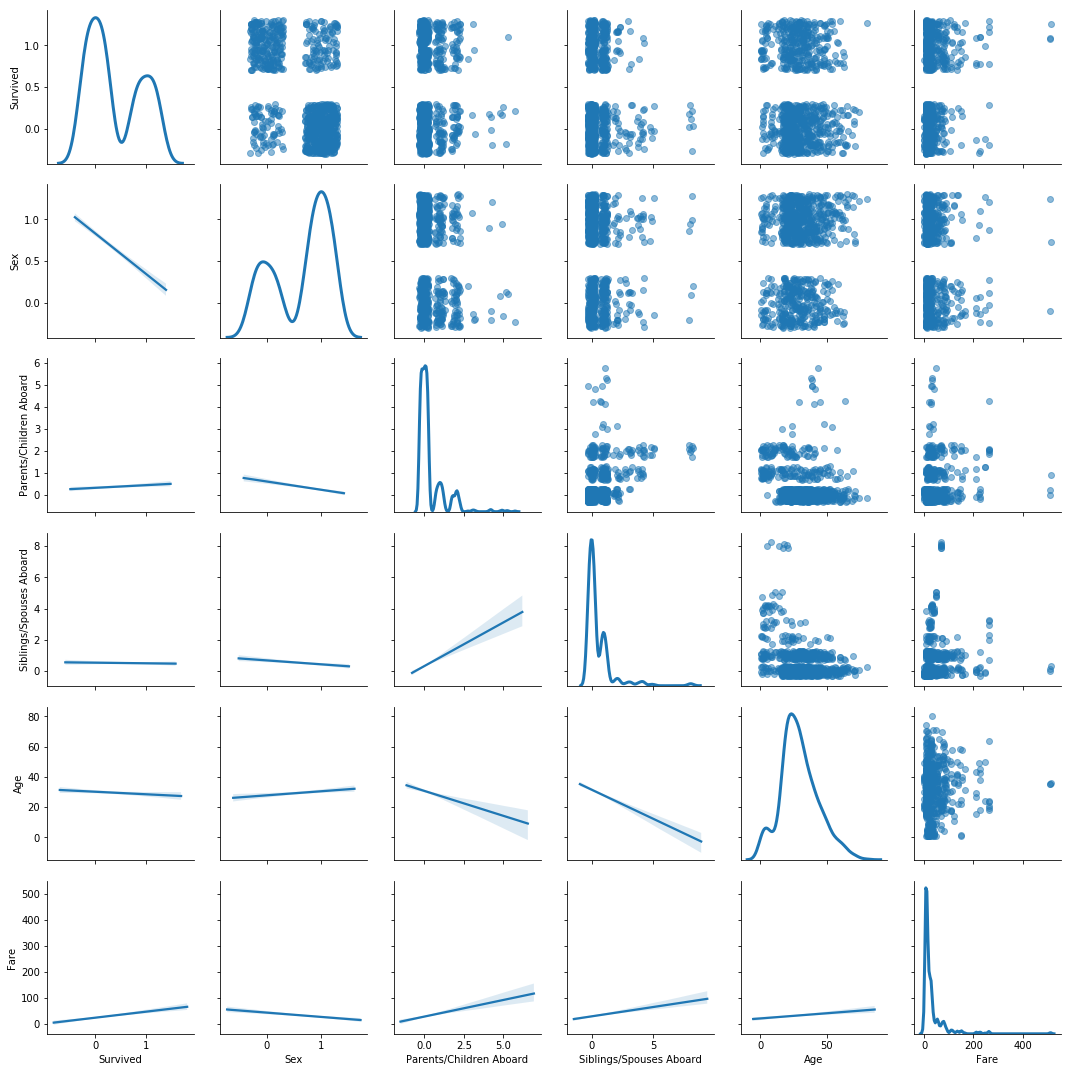

In [3]:
df_jittered = df[['Survived', 'Sex', 'Parents/Children Aboard',
                  'Siblings/Spouses Aboard', 'Age', 'Fare']]
jitter = pd.DataFrame(np.random.uniform(-.3, .3,
                                        size=(df_jittered.shape)), columns=df_jittered.columns)
df_jittered = df_jittered.add(jitter)
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.542152,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,0.129507,-0.391492,0.085026,0.020252,-0.548919
Sex,-0.542152,0.129507,1.000000,0.091875,-0.113249,-0.244337,-0.181137
Age,-0.059665,-0.391492,0.091875,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.113249,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.244337,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,-0.181137,0.112329,0.158839,0.215470,1.000000


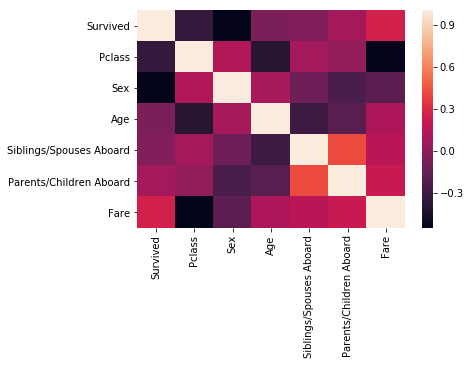

In [4]:
sns.heatmap(df.corr())
df.corr()

c:\users\t420\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\t420\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


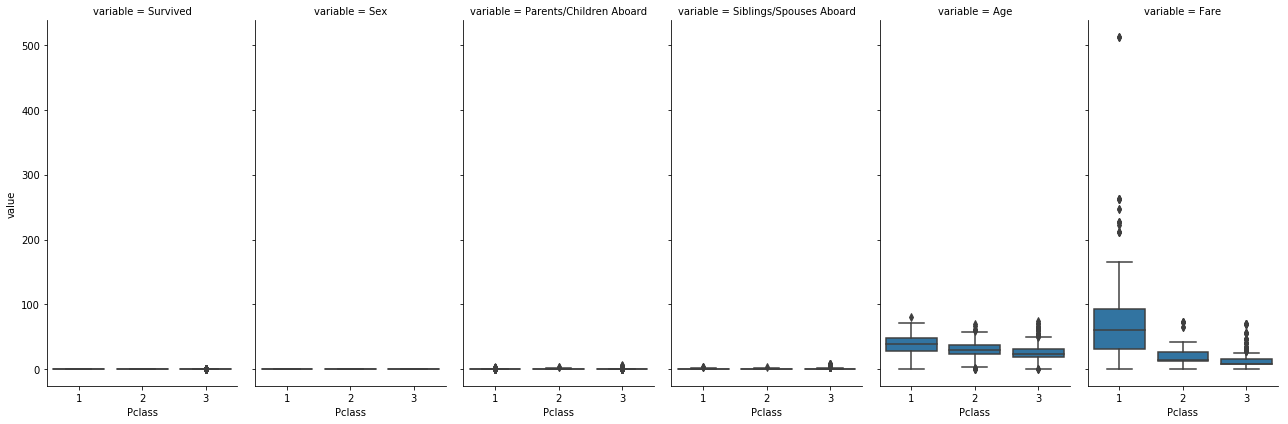

         value                                                       
         count       mean        std  min  25%  50%     75%       max
Pclass                                                               
1       1296.0  20.818544  45.301323  0.0  0.0  1.0  30.000  512.3292
2       1104.0   8.728869  14.332205  0.0  0.0  1.0  13.000   73.5000
3       2922.0   6.810258  11.789242  0.0  0.0  1.0   7.925   74.0000


In [23]:
df_long = df[['Survived', 'Sex', 'Pclass', 'Parents/Children Aboard',
              'Siblings/Spouses Aboard', 'Age', 'Fare']]
df_long = pd.melt(df_long, id_vars=['Pclass'])
g = sns.FacetGrid(df_long, col="variable", size=6, aspect=.5)
g = g.map(sns.boxplot, "Pclass", "value")
plt.show()
print(df_long.groupby('Pclass').describe())

In [6]:
features = pd.get_dummies(df['Pclass'])
features['Survived'] = np.where((df['Pclass'].isin([1, 2])), 1, 0)
print(pd.crosstab(features['Survived'], df['Pclass']))

Pclass      1    2    3
Survived               
0           0    0  487
1         216  184    0


In [7]:
features['Adult_65plus'] = np.where(df['Age'] >= 65, 1, 0)
print(df['Age'].groupby(features['Adult_65plus']).describe())

              count       mean        std    min   25%   50%   75%   max
Adult_65plus                                                            
0             874.0  28.877197  13.342488   0.42  20.0  28.0  37.0  64.0
1              13.0  69.423077   4.300417  65.00  66.0  70.0  71.0  80.0


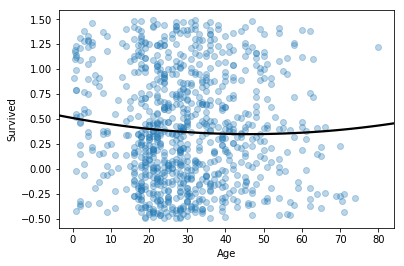

In [8]:
sns.regplot(
    df['Age'],
    y=df['Survived'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'black'},
    ci=None)
plt.show()